In [ ]:
from tables import Table
import tkinter as tk
root = tk.Tk()
app = Table(master=root)
app.mainloop()

заполнил таблицы 226_1.tab и 226_2.tab в tables

In [2]:
from praclib import read_from_file
tab1 = read_from_file("tables/226_1.tab", "\t")
tab2 = read_from_file("tables/226_2.tab", "\t")

In [1]:
import numpy as np
p = tab1[::, 2] - tab1[::, 1]
lnp = np.log(p)
tinv = (tab1[::, 0] + 273.3) ** -1
tab1_res = np.hstack((tab1, np.vstack((p, lnp, tinv)).transpose()))
print("\n".join(["\t".join(map(str, i)) for i in tab1_res]))

ModuleNotFoundError: No module named 'numpy'

In [4]:
from value import Value
from plotter import Plotter

In [5]:
T = np.array([Value(values=[i], syst=0.5) for i in tab1_res[::, 0]])
h1 = np.array([Value(values=[i], syst=2.0) for i in tab1_res[::, 1]])
h2 = np.array([Value(values=[i], syst=2.0) for i in tab1_res[::, 2]])
# pval = h2 - h1
# [14. 25. 31. 68. 85.]
pval = np.array([Value(values=[i], syst=4.0) for i in np.array([14.0, 25.0, 49.0, 68.0, 75.0])])

from sympy import log
lnpval = np.array([p.use_func(log) for p in pval])
Tinvval = np.array([t.use_func(lambda x: 1.0 / x) for t in T])

$P_1$: A = -6E+1 +- 1.5E+2 B = 5.54 +- 0.08 R = -0.9850124621683968


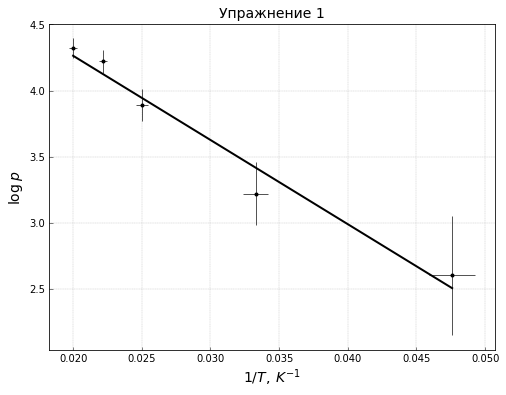

In [6]:
Plotter.NUMBER_OF_SIGMA = 1.5
Plotter(draw_legend=False).set_name("226_1").set_title("Упражнение 1").set_x_name("$1 / T,\\: K^{-1}$").set_y_name(
        "$\\log \\:p$"). \
        add_line(Plotter.get_new_line(y_value=lnpval, x_value=Tinvval,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

$P_1$: A = 2.23 +- 0.07 B = -4E+1 +- 1.0E+2 R = 0.9868345247851463


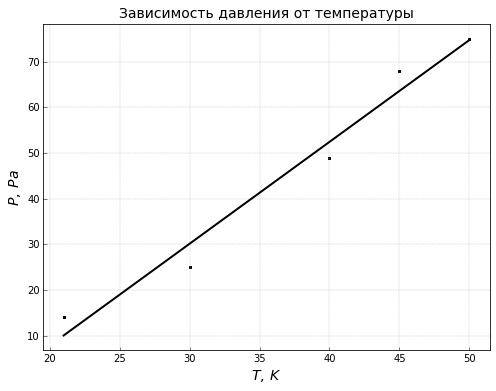

In [7]:
Plotter(draw_legend=False).set_name("226_2").set_title("Зависимость давления от температуры").set_x_name("$T,\\: K$").set_y_name(
        "$P, \\:Pa$"). \
        add_line(Plotter.get_new_line(y_value=pval, x_value=T,
                                      draw_error=False, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [37]:
A = Value(name="A", values=[-60], syst=12)
R = Value(name="R", values=[8.31], syst=0.01)
Q = A * R
print(Q.get_value_error())
q = Q / Value(values=[0.018], syst=0.0)
print(q.get_value_error())
a = Value(values=[0.018], syst=0.0) ** Value(const=2) * (q - Value(const=106 * 2230))
print(a.get_value_error())

(Decimal('-5.0E+2'), Decimal('1.0E+2'))
(Decimal('-2.8E+4'), Decimal('6E+3'))
(Decimal('-85.6'), Decimal('1.8'))


In [8]:
tmid = np.array([Value(values=st[1::], syst=0.3) for st in tab2])
ro0 = Value(const=960)
beta = Value(const=7 * 10 ** -4)
T0 = Value(const=20)
ro = ((T - T0) * beta + Value(const=1)) ** Value(const=-1) * ro0
B = Value(values=[42], syst=5)
eta = T * tmid
for i in ro:
    print(i)

959.3 ± 0.3
953.3 ± 0.3
946.7 ± 0.3
943.5 ± 0.3
940.3 ± 0.3


$P_1$: A = 34 +- 5 B = 4.588 +- 0.007 R = 0.9944400603081914


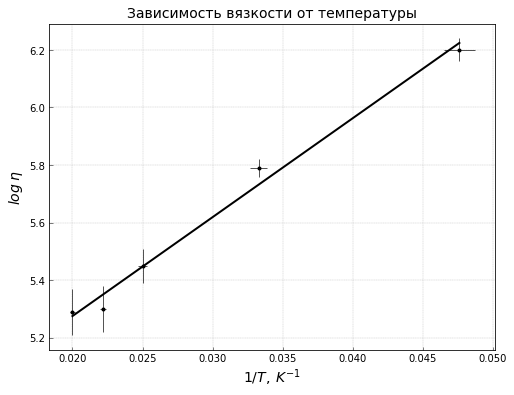

In [9]:
Plotter.NUMBER_OF_SIGMA = 1.0
Plotter(draw_legend=False).set_name("226_3").set_title("Зависимость вязкости от температуры").set_x_name("$1/T,\\: K^{-1}$").set_y_name(
        "$log\\:\eta$"). \
        add_line(Plotter.get_new_line(y_value=np.array([e.use_func(log) for e in eta]), x_value=Tinvval,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

$P_1$: A = 1.5E+2 +- 1.4E+2 B = -1.6E+2 +- 1.5E+2 R = 0.9875466055360165


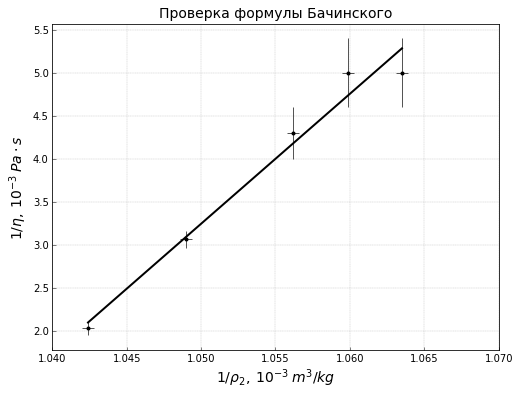

In [10]:
Plotter(draw_legend=False).set_name("226_4").set_title("Проверка формулы Бачинского").set_x_name("$1/\\rho_2,\\: 10^{-3} \\: m^3 / kg$").set_y_name(
        "$1/\eta,\\: 10^{-3}\\:Pa \cdot s$"). \
        add_line(Plotter.get_new_line(y_value=eta ** Value(const=-1) * Value(const=1000), x_value=ro ** Value(const=-1) * Value(const=1000),
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True, xlim=(1.04, 1.07))

In [68]:
b = Value(const=0.018) * Value(const=30) / Value(const=40)
print(b)

0.01349999999999999811262085813723388127982616424560546875 ± 0
